In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

# generate data
X, y = datasets.make_classification(n_samples=10000, n_features=50, n_redundant=10, n_informative=10,
                           random_state=1, n_clusters_per_class=2,n_classes=3, class_sep=2)
                           
# divide data in Train - Validation - Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

# Standardize Data
sc = StandardScaler()
X_tr_std = sc.fit_transform(X_tr)
X_valid_std = sc.transform(X_valid)
X_test_std = sc.transform(X_test)

<module 'pandas' from '/opt/conda/lib/python3.10/site-packages/pandas/__init__.py'>

lr parameter is now learning_rate. An easy fix to get this to run!

In [8]:
encoder = keras.models.Sequential([
    keras.layers.Dense(5, input_shape=[50]),
])

decoder = keras.models.Sequential([
    keras.layers.Dense(50, input_shape=[5]),
])

autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer = keras.optimizers.SGD(learning_rate=0.1))

history = autoencoder.fit(X_tr_std,X_tr_std, epochs=100,validation_data=(X_valid_std,X_valid_std),
                         callbacks=[keras.callbacks.EarlyStopping(patience=10)])
                         
codings_train = encoder.predict(X_tr_std)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0624 - val_loss: 0.8214
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8038 - val_loss: 0.7530
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7507 - val_loss: 0.7173
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7158 - val_loss: 0.6985
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6970 - val_loss: 0.6906
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6949 - val_loss: 0.6866
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6895 - val_loss: 0.6849
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6890 - val_loss: 0.6840
Epoch 9/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6916 - val_loss: 0.6833
Epoch 10/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6861 - val_loss: 0.6831
Epoch 11/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6864 - val_loss: 0.6828
Epoch 12/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5,svd_solver='auto')
scores_train = pca.fit_transform(X_tr_std) # u

Looks like this code requires data from the PCA and AutoEncoder runs.  My guess is that it wants the scores info, named as scores and coding \_train. Right now they are both named just 'scores'.

In [11]:
codings_train

array([[ 1.3820019 ,  1.7183996 ,  0.22953454, -1.5504884 ,  0.37277624],
       [-2.6883621 ,  2.5838678 , -0.23049432,  3.0288815 , -1.585523  ],
       [ 0.12287882,  0.0491237 ,  0.7004745 , -2.1735427 , -0.91518605],
       ...,
       [ 1.3838222 , -1.3862643 , -1.7162491 , -1.080552  , -1.3395004 ],
       [-0.7418265 , -0.45249373, -0.96257746, -0.9759781 ,  1.2848684 ],
       [-1.4652166 ,  0.00808545,  1.5076877 , -1.3787271 ,  0.34662208]],
      dtype=float32)

(0.9, 1.0)

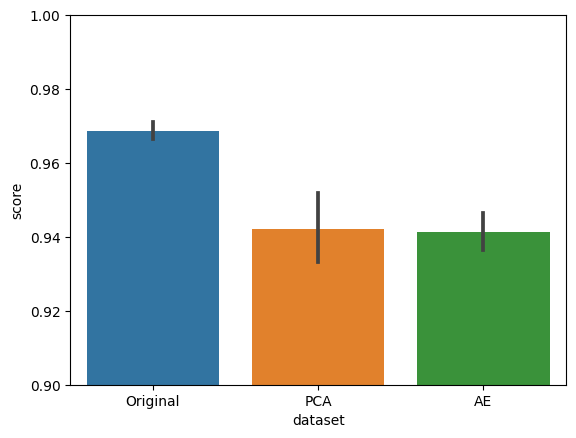

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=200, max_depth=5)

labels = ['Original', 'PCA','AE']
scores = pd.DataFrame(columns=labels)
scores['PCA'] = cross_val_score(rfc, scores_train, y_tr, cv=5)
scores['AE'] = cross_val_score(rfc, codings_train, y_tr, cv=5)
scores['Original'] = cross_val_score(rfc, X_tr_std, y_tr, cv=5)

sns.barplot(x='dataset', y='score', data = scores.melt(value_name='score', var_name='dataset'))
plt.ylim(0.9,1)

Kaggle is struggling to present a usable UI... With no way to add notes at the top, I will put them wherever I can.

A great exercise would be to see if I can produce the scatter plots from the original document which are shown, without code.